In [1]:
# Regresión Lineal Múltiple
# Cómo importar las librerías

import numpy as np                # manejo de matrices
import matplotlib.pyplot as plt   # manejo de gráficas
import pandas as pd               # manejo de dataframes
import seaborn as sns             # manejo de gráficas

In [2]:
# Importar el data set

link = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vRmiurMw8cuExDVn6c2fQdwsb3-79ZaQ5EC5nyBtD3nIHMBQhWzGfmRB2hy6QA-2A/pub?gid=772676963&single=true&output=csv'

# leer el enlace y guardarlo en la variable llamada dataset

dataset = pd.read_csv(link)
dataset.head()

,activo_id,ciclo,os1,os2,os3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,-0.0005,0.0004,100,518.67,642.36,1583.23,1396.84,14.62,...,522.31,2388.01,8145.32,8.4246,0.03,391,2388,100,39.11,23.3537
1,1,2,0.0008,-0.0003,100,518.67,642.50,1584.69,1396.89,14.62,...,522.42,2388.03,8152.85,8.4403,0.03,392,2388,100,38.99,23.4491
2,1,3,-0.0014,-0.0002,100,518.67,642.18,1582.35,1405.61,14.62,...,522.03,2388.00,8150.17,8.3901,0.03,391,2388,100,38.85,23.3669
3,1,4,-0.0020,0.0001,100,518.67,642.92,1585.61,1392.27,14.62,...,522.49,2388.08,8146.56,8.3878,0.03,392,2388,100,38.96,23.2951
4,1,5,0.0016,0.0000,100,518.67,641.68,1588.63,1397.65,14.62,...,522.58,2388.03,8147.80,8.3869,0.03,392,2388,100,39.14,23.4583


In [5]:
# cuantos activos hay?

dataset.activo_id.unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100], dtype=int64)

In [6]:
# si se desea borrar alguna o varias columnas seguir lo siguiente

dataset = dataset.drop(columns=['os1','os2','os3'],axis = 1)
dataset.head()

,activo_id,ciclo,s1,s2,s3,s4,s5,s6,s7,s8,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,518.67,642.36,1583.23,1396.84,14.62,21.61,553.97,2387.96,...,522.31,2388.01,8145.32,8.4246,0.03,391,2388,100,39.11,23.3537
1,1,2,518.67,642.50,1584.69,1396.89,14.62,21.61,554.55,2388.00,...,522.42,2388.03,8152.85,8.4403,0.03,392,2388,100,38.99,23.4491
2,1,3,518.67,642.18,1582.35,1405.61,14.62,21.61,554.43,2388.03,...,522.03,2388.00,8150.17,8.3901,0.03,391,2388,100,38.85,23.3669
3,1,4,518.67,642.92,1585.61,1392.27,14.62,21.61,555.21,2388.00,...,522.49,2388.08,8146.56,8.3878,0.03,392,2388,100,38.96,23.2951
4,1,5,518.67,641.68,1588.63,1397.65,14.62,21.61,554.74,2388.04,...,522.58,2388.03,8147.80,8.3869,0.03,392,2388,100,39.14,23.4583


Aqui obtenemos los máximos ciclos por activo

In [7]:
# tabla de maximos

max = dataset.groupby('activo_id').agg({'ciclo':'max'}).reset_index()
max.columns =['activo_id','ciclo_max']
max.head()

,activo_id,ciclo_max
0,1,259
1,2,253
2,3,222
3,4,272
4,5,213


In [8]:
freq = np.histogram(max.ciclo_max, 6)
frecuencias = freq[0]

In [9]:
freq

(array([45, 27, 14,  5,  5,  4], dtype=int64),
 array([145.        , 208.33333333, 271.66666667, 335.        ,
        398.33333333, 461.66666667, 525.        ]))

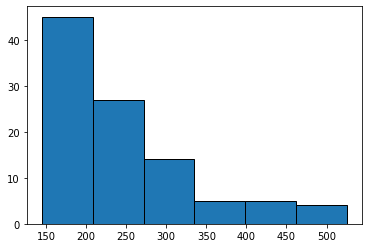

In [10]:
plt.hist(max.ciclo_max,bins = 6,edgecolor='k')
plt.show()

In [11]:
# cruzamos tablas

df = pd.merge(dataset,max, how = 'inner', on ='activo_id' )

In [12]:

df['RUL'] = df.ciclo_max - df.ciclo
df.head()

,activo_id,ciclo,s1,s2,s3,s4,s5,s6,s7,s8,...,s14,s15,s16,s17,s18,s19,s20,s21,ciclo_max,RUL
0,1,1,518.67,642.36,1583.23,1396.84,14.62,21.61,553.97,2387.96,...,8145.32,8.4246,0.03,391,2388,100,39.11,23.3537,259,258
1,1,2,518.67,642.50,1584.69,1396.89,14.62,21.61,554.55,2388.00,...,8152.85,8.4403,0.03,392,2388,100,38.99,23.4491,259,257
2,1,3,518.67,642.18,1582.35,1405.61,14.62,21.61,554.43,2388.03,...,8150.17,8.3901,0.03,391,2388,100,38.85,23.3669,259,256
3,1,4,518.67,642.92,1585.61,1392.27,14.62,21.61,555.21,2388.00,...,8146.56,8.3878,0.03,392,2388,100,38.96,23.2951,259,255
4,1,5,518.67,641.68,1588.63,1397.65,14.62,21.61,554.74,2388.04,...,8147.80,8.3869,0.03,392,2388,100,39.14,23.4583,259,254


In [13]:
df.drop(columns=['ciclo_max'],axis = 1, inplace =True)

Voy a escoger 1 turbina

In [14]:
dataset = df.query("activo_id == 15")
dataset.shape

(202, 24)

Mapa de correlogramas

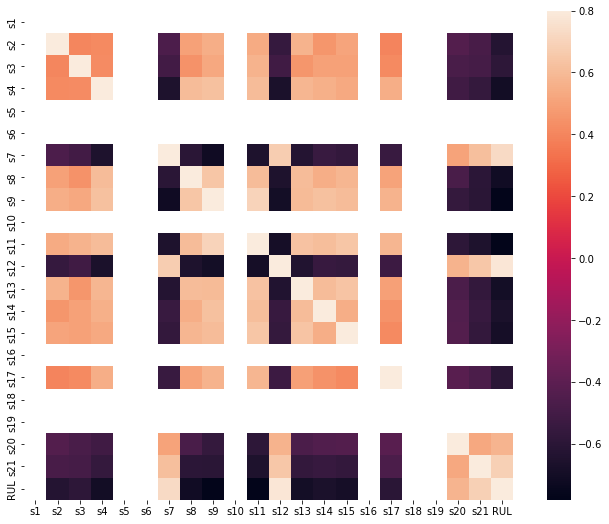

In [15]:
# Matriz de correlación:
plt.figure(figsize=(12,9))

corrmat = dataset.iloc[:,2:].corr()
# f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [16]:
corr = dataset.corr()
corr[['RUL']].sort_values(by = 'RUL',ascending = False).style.background_gradient()

,RUL
RUL,1.000000
s12,0.777035
s7,0.725885
s21,0.685319
s20,0.575924
s3,-0.590478
s17,-0.603371
s2,-0.633003
s14,-0.665495
s15,-0.690792


C:\Users\RAKU\.conda\envs\DataScientist\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


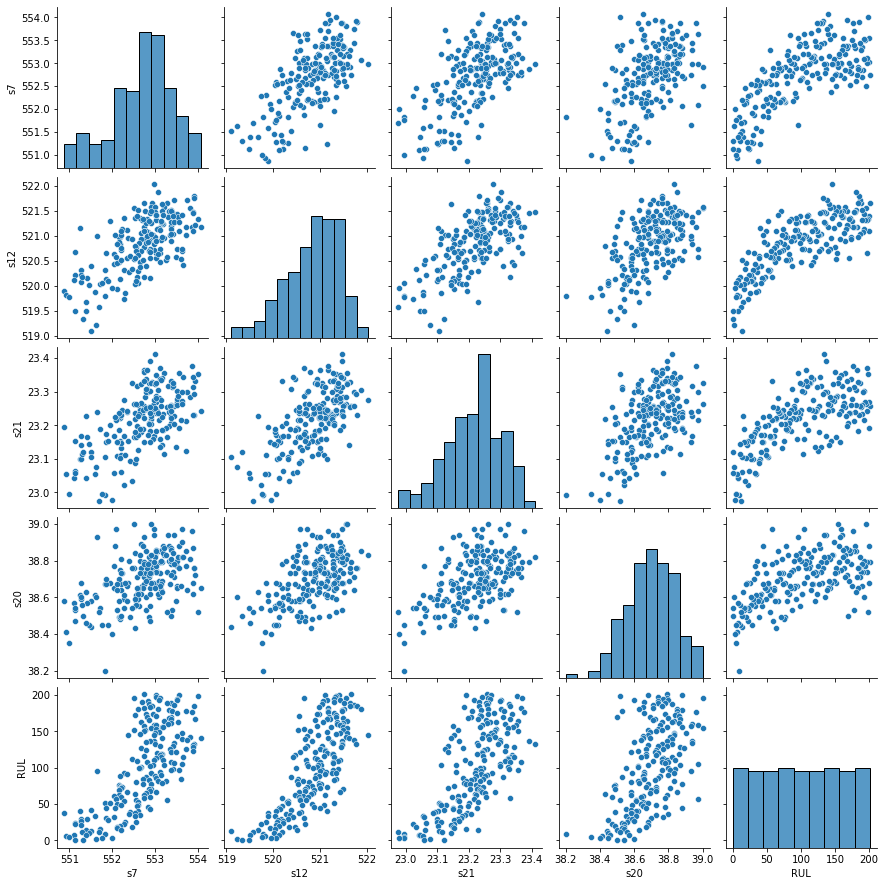

In [17]:
sns.pairplot(dataset.loc[:,['s7','s12','s21','s20','RUL']],size=2.5)

Paso 1 Seleccional la matriz de características

In [18]:
# selecciono las variables

X = dataset.loc[:, ['s7','s12','s21','s20']].values # me refiero a los sensores del mismo nombre
y = dataset.iloc[:, -1].values  # me refiero al RUL

train_test_split

In [19]:
# Dividir el data set en conjunto de entrenamiento y conjunto de testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train.shape, X_test.shape

((161, 4), (41, 4))

Creación del modelo

In [20]:
# Ajustar el modelo de Regresión lineal múltiple con el conjunto de entrenamiento

from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [21]:
# Predicción de los resultados en el conjunto de testing

y_pred = regression.predict(X_test)

In [22]:
# verificar el score del modelo

regression.score(X_test,y_test)

0.7231585599988537

# Gráfica la data real vs la y_pred

Text(0.5, 1.0, 'Relación lineal entre valores reales y predichos')

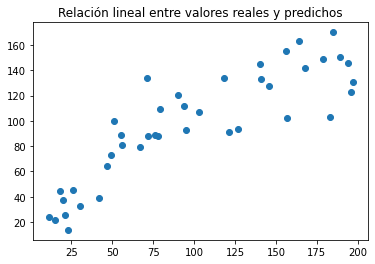

In [23]:
# comparar y_test vs y_pred

plt.scatter(y_test,y_pred)
plt.title('Relación lineal entre valores reales y predichos')

In [24]:
# transformar arrays en vector columna

a = y_test.reshape(-1,1)
b = y_pred.reshape(-1,1)

In [25]:
# concatenamos los vectores en un solo dataset
c = np.concatenate([a,b],axis=1)

In [26]:
c= pd.DataFrame(c,columns=['real','model'])
c.head()

,real,model
0,183.0,103.222075
1,30.0,32.660658
2,94.0,111.974577
3,103.0,107.126546
4,23.0,13.799070


In [27]:
c = pd.DataFrame(c,columns=['real','model'])
c.corr()

,real,model
real,1.00000,0.86421
model,0.86421,1.00000


In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [29]:
mean_absolute_error(y_test,y_pred)

24.281343043499298

In [30]:
mse =mean_squared_error(y_test,y_pred)

In [31]:
np.sqrt(mse)

31.613146171528655

In [32]:
r2_score(y_test,y_pred)

0.7231585599988537

In [33]:
regression.score(X_test,y_test)

0.7231585599988537